In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'/Users/leodegeus/projectsPythonGH'

In [3]:
movies = pd.read_csv('/Users/leodegeus/Downloads/Movie-Ratings.csv')

In [4]:
len(movies)

559

In [5]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [7]:
movies.columns = ['Films','Genre','CriticRating','AudienceRatings','BudgetMillions','Years']

In [8]:
movies.head()

,Films,Genre,CriticRating,AudienceRatings,BudgetMillions,Years
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Films              559 non-null object
Genre              559 non-null object
CriticRating       559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillions     559 non-null int64
Years              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [10]:
movies.describe()

,CriticRating,AudienceRatings,BudgetMillions,Years
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [11]:
movies.Genre = movies.Genre.astype('category')

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Films              559 non-null object
Genre              559 non-null category
CriticRating       559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillions     559 non-null int64
Years              559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 22.8+ KB


In [13]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [14]:
movies.describe()

,CriticRating,AudienceRatings,BudgetMillions,Years
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [16]:
#Jointplots

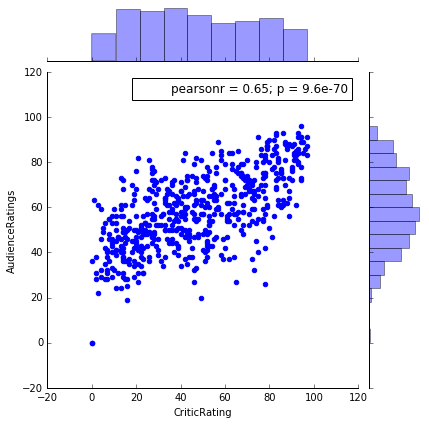

In [17]:
j = sns.jointplot(data=movies, x='CriticRating',y='AudienceRatings', kind ='scatter')

---

In [18]:
#Histograms

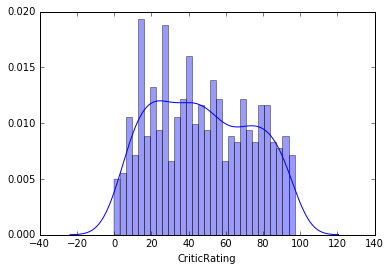

In [19]:
m1 = sns.distplot(movies.CriticRating, bins =30)

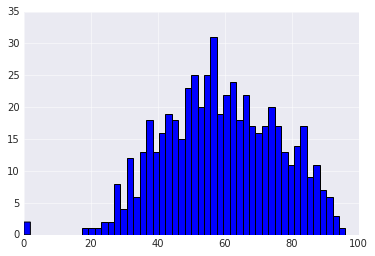

In [20]:
sns.set_style("darkgrid")
n1 = plt.hist(movies.AudienceRatings,bins=50)

In [21]:
# Stacked Histograms

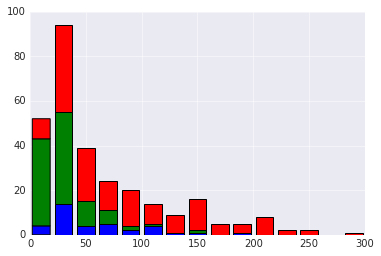

In [22]:


plt.hist([movies[movies.Genre == 'Thriller'].BudgetMillions, \
          movies[movies.Genre == 'Drama'].BudgetMillions, \
          movies[movies.Genre == 'Action'].BudgetMillions], \
         bins =15,stacked='true')
plt.show()

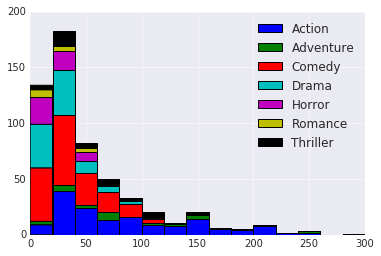

In [23]:
categories = movies.Genre.cat.categories
myLabels = list()
listGenre = []
for cat in categories :
    listGenre.append(movies[movies.Genre == cat].BudgetMillions)
    myLabels.append(cat)
plt.hist(listGenre, \
         bins =15,stacked='true',rwidth=1, label=myLabels)
plt.legend()
plt.show()

In [24]:
filter = movies.BudgetMillions > 150
filter2 = movies.Years == 2011
print(len(filter))
print(len(filter2))
movies[filter & filter2]

559
559


,Films,Genre,CriticRating,AudienceRatings,BudgetMillions,Years
76,Cowboys and Aliens,Action,44,50,163,2011
152,Green Lantern,Action,27,48,200,2011
303,Pirates of the Caribbean: On Stranger Tides,Action,34,61,250,2011
500,Transformers: Dark of the Moon,Action,35,67,195,2011
547,X-Men: First Class,Action,87,88,160,2011


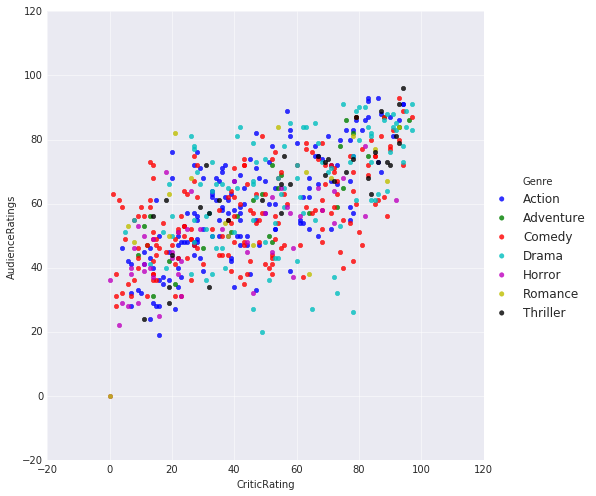

In [25]:
vis1 = sns.lmplot(data=movies,x = 'CriticRating', y = 'AudienceRatings', fit_reg=False, hue = 'Genre', size=7,aspect=1)

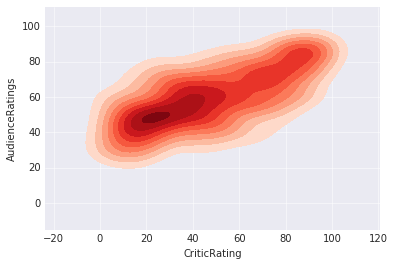

In [26]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRatings, shade=True, shade_lowest=False, cmap='Reds')

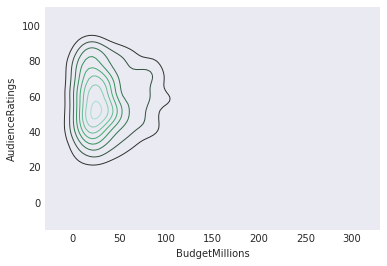

In [27]:
sns.set_style("dark")
k2 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRatings)

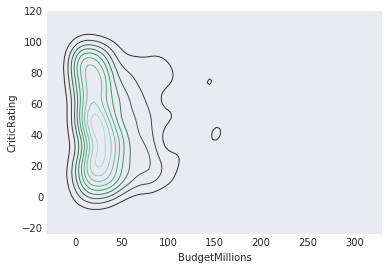

In [28]:
k3 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating)

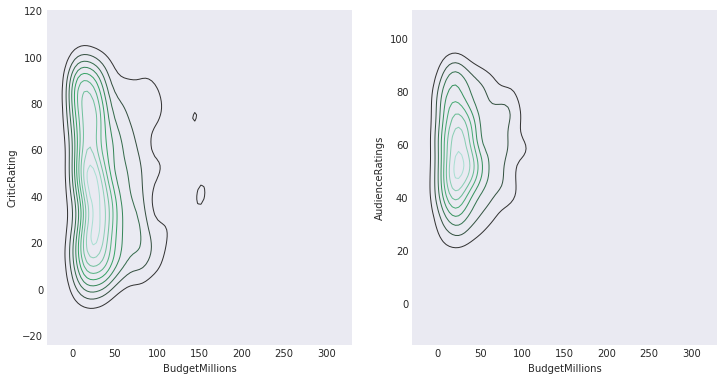

In [29]:
f, axes = plt.subplots(1,2,figsize=(12,6))
k1 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating,ax = axes[0])
k2 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRatings,ax=axes[1])

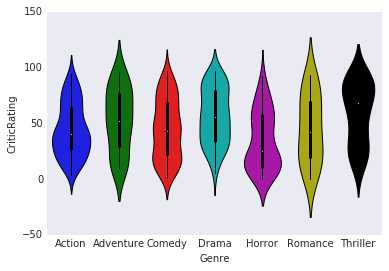

In [30]:
violin = sns.violinplot(data=movies,x='Genre',y="CriticRating")

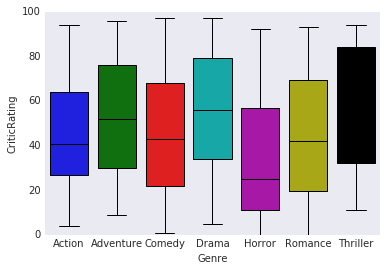

In [31]:
box = sns.boxplot(data=movies,x = movies.Genre,y=movies.CriticRating)

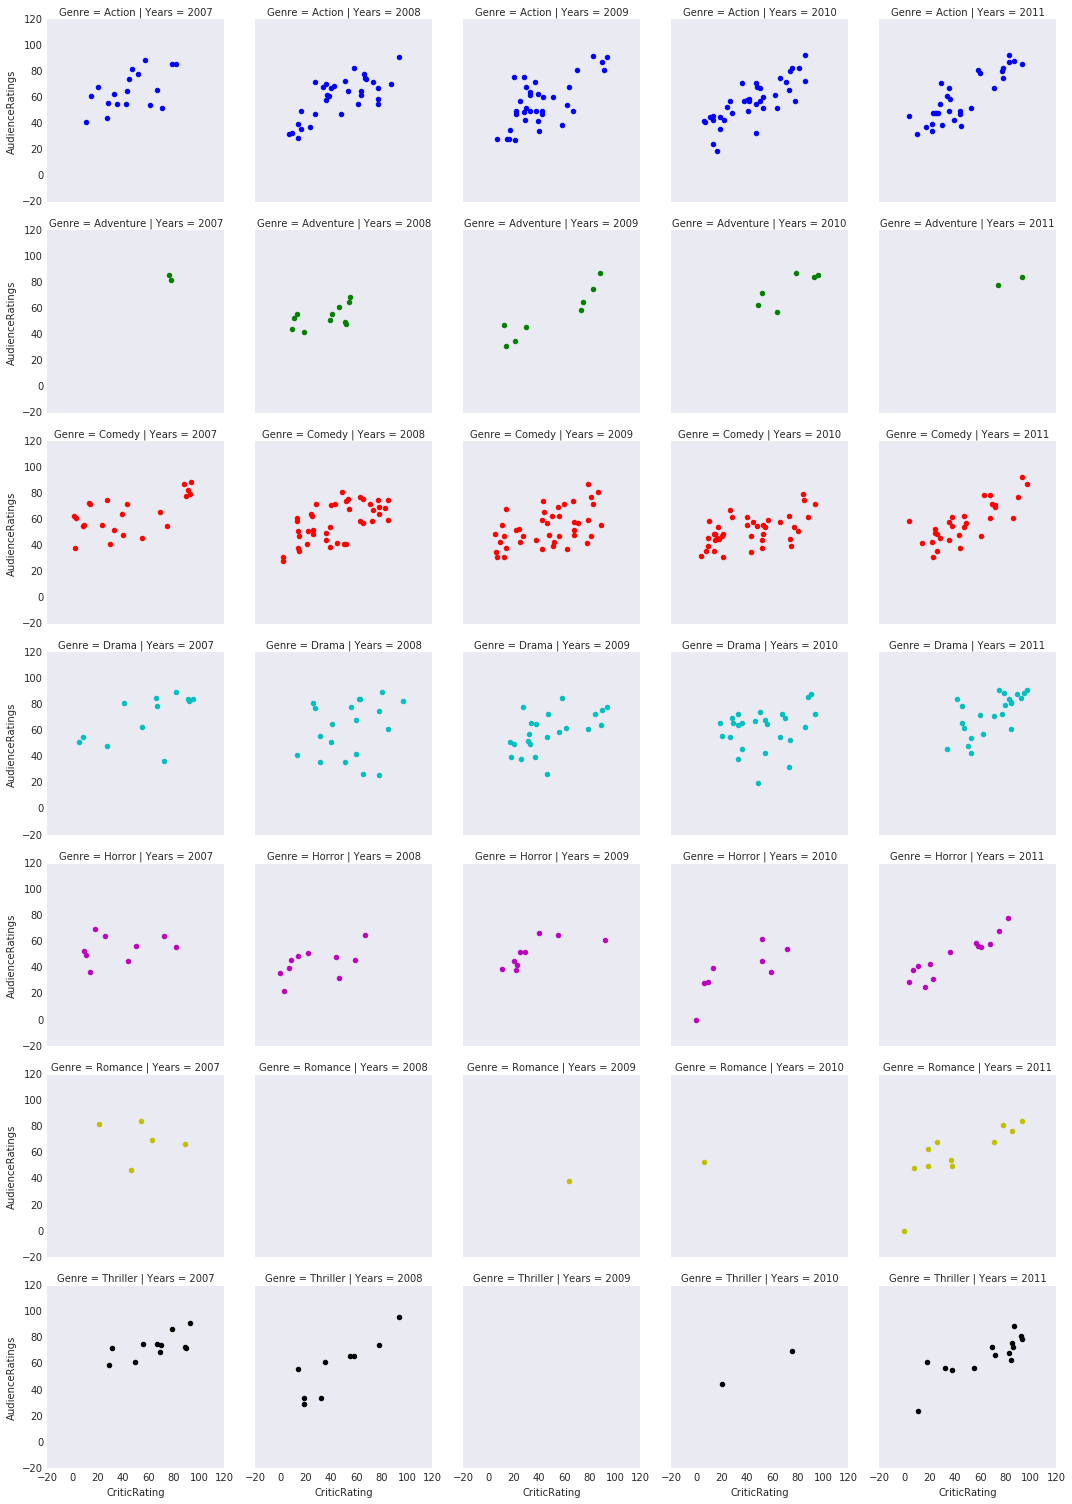

In [32]:
g = sns.FacetGrid(movies,row="Genre",col="Years",hue="Genre")
g = g.map(plt.scatter,"CriticRating","AudienceRatings")

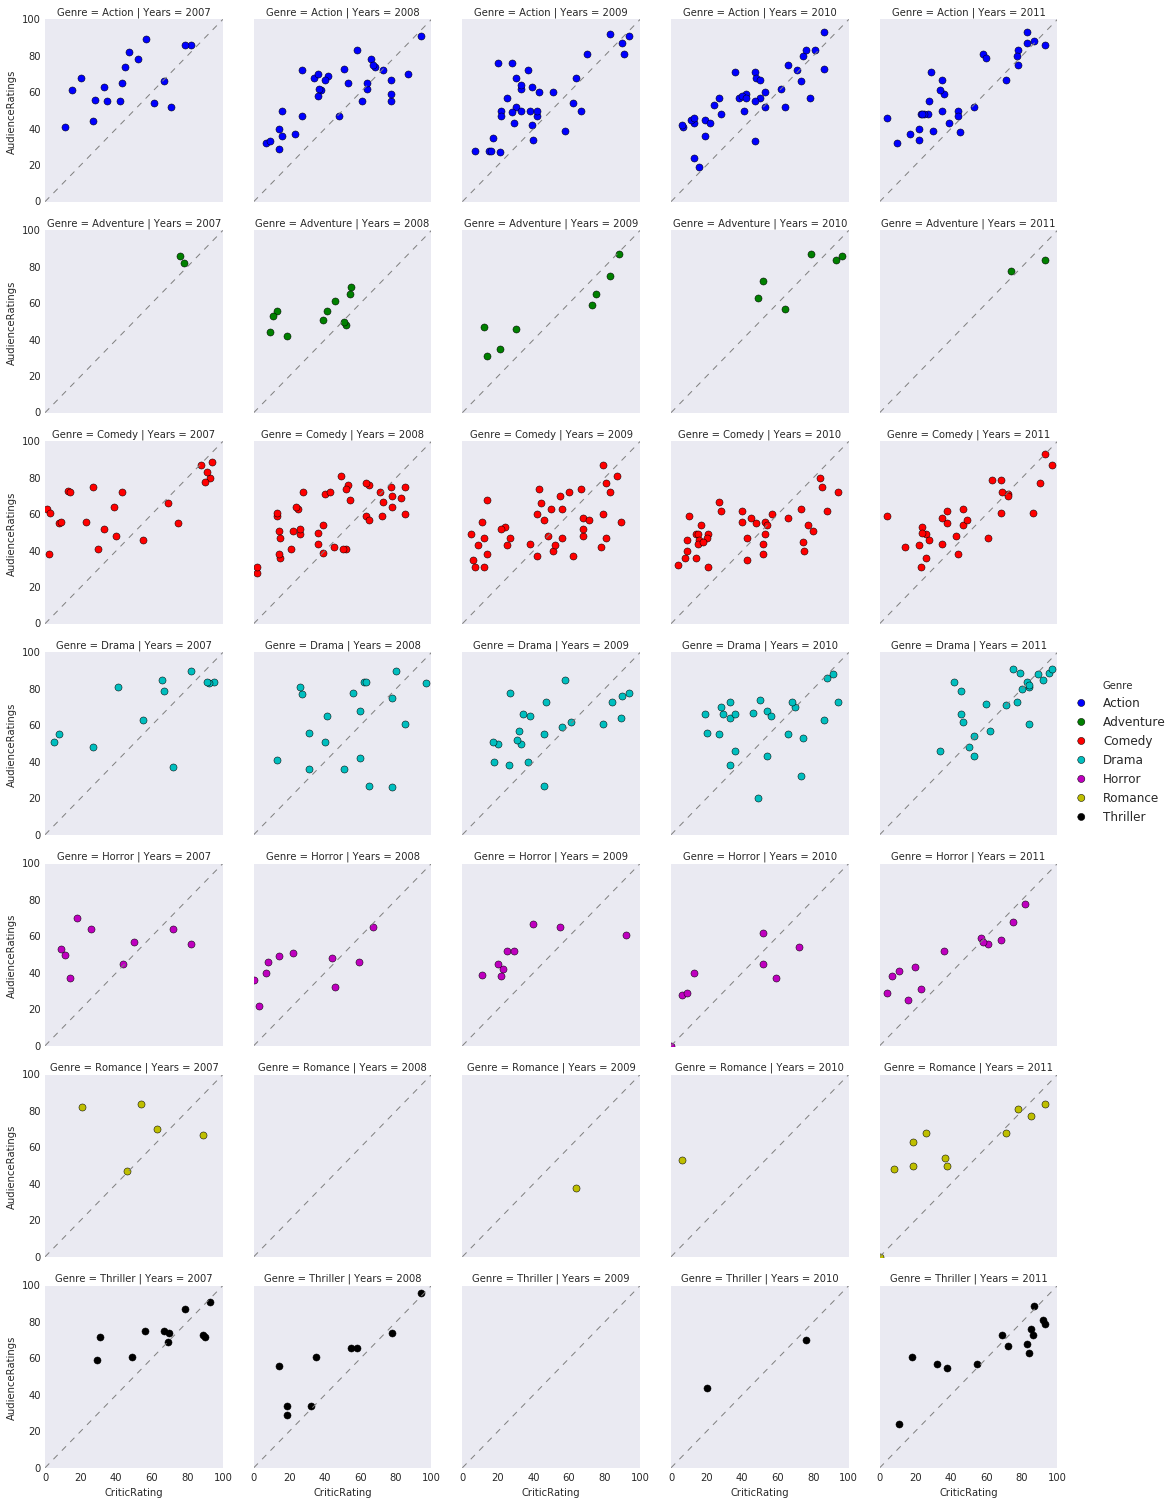

In [38]:
g = sns.FacetGrid(movies,row="Genre",col="Years",hue="Genre")
kws = dict(s=50, linewidth=0.5, edgecolor = 'black')
g = g.map(plt.scatter,"CriticRating","AudienceRatings", **kws)
g.set(xlim=(0,100),ylim=(0,100))

for ax in g.axes.flat:
    ax.plot((0,100),(0,100), c="gray",ls="--")
    
g.add_legend()

In [45]:
from matplotlib import pyplot as plt
import seaborn as sn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

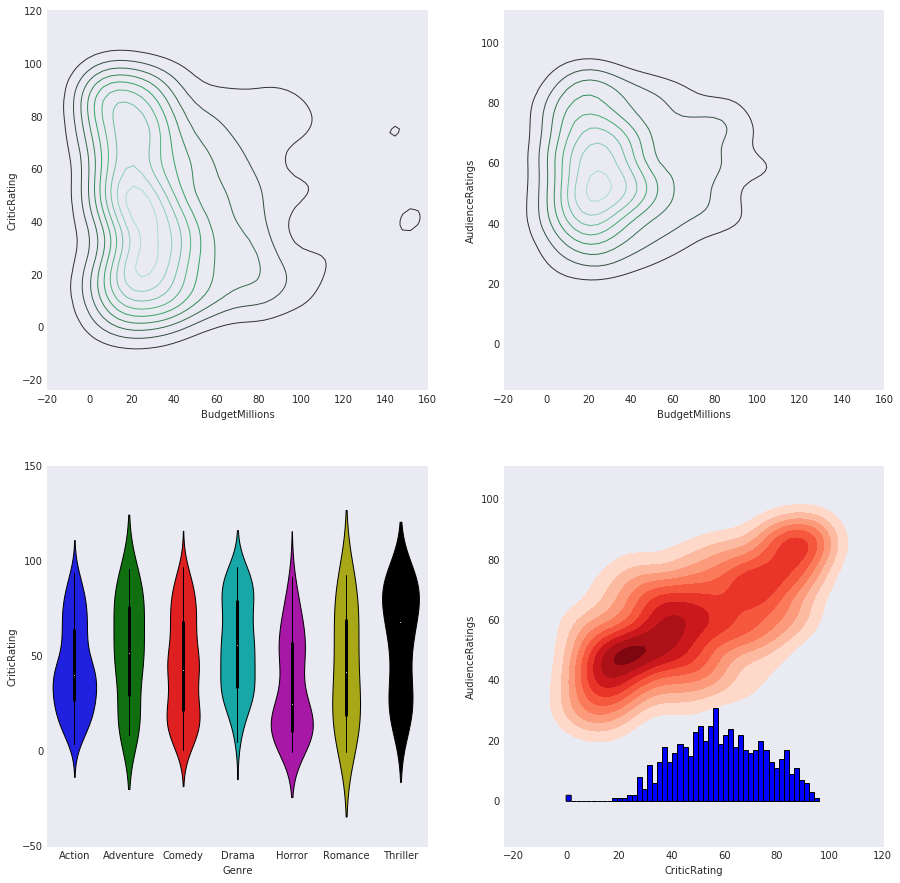

In [59]:
f, axes = plt.subplots(2,2,figsize= (15,15))
k1 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating,ax = axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRatings,ax=axes[0,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
k3 = sns.violinplot(data=movies,x='Genre',y="CriticRating",ax=axes[1,0])
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRatings, shade=True, shade_lowest=False, cmap='Reds',ax=axes[1,1])
axes[1,1].hist(movies.AudienceRatings,bins=50)
plt.show()

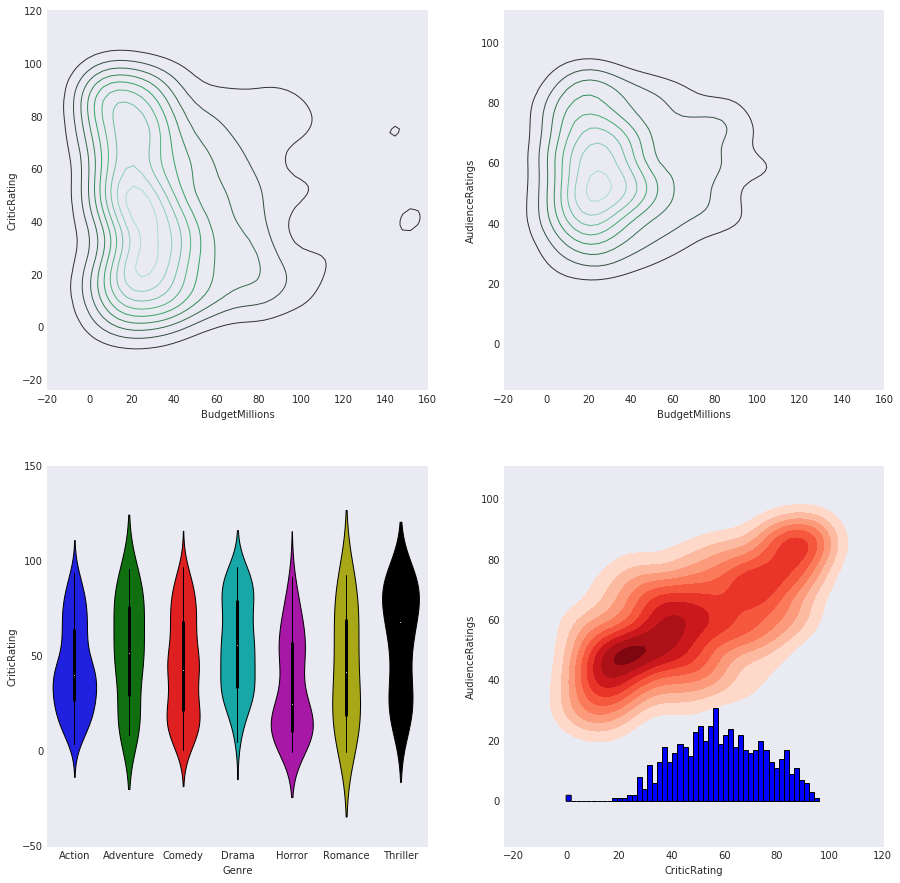

In [72]:


f, axes = plt.subplots(2,2,figsize= (15,15))

k1 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating,ax = axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRatings,ax=axes[0,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
k3 = sns.violinplot(data=movies,x='Genre',y="CriticRating",ax=axes[1,0])
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRatings, shade=True, shade_lowest=False, cmap='Reds',ax=axes[1,1])
axes[1,1].hist(movies.AudienceRatings,bins=50)
plt.show()